# Estimación máximo-verosímil

## Definición
El **estimador máximo-verosímil** de un vector de parámetros $\;\boldsymbol{\theta}$ con respecto a un conjunto de $N$ datos $\;\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}$ independientes e idénticamente distribuidos según una fdp (o fp) $\;p(\boldsymbol{y}\mid\boldsymbol{x}, \boldsymbol{\theta})$ es:
$$\begin{align*}
\hat{\boldsymbol{\theta}}_{\text{mle}}%
&=\operatorname*{argmax}\limits_{\boldsymbol{\theta}}\; \operatorname{L}(\boldsymbol{\theta})%
\quad\text{con}\quad%
\operatorname{L}(\boldsymbol{\theta})%
=p(\mathcal{D}\mid\boldsymbol{\theta})%
=\prod_{n=1}^N \;p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})\\%
&=\operatorname*{argmax}\limits_{\boldsymbol{\theta}}\; \operatorname{LL}(\boldsymbol{\theta})%
\quad\text{con}\quad%
\operatorname{LL}(\boldsymbol{\theta})%
=\log \operatorname{L}(\boldsymbol{\theta})%
=\sum_{n=1}^N \;\log p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})\\%
&=\operatorname*{argmin}\limits_{\boldsymbol{\theta}}\; \operatorname{NLL}(\boldsymbol{\theta})%
\quad\text{con}\quad%
\operatorname{NLL}(\boldsymbol{\theta})%
=-\operatorname{LL}(\boldsymbol{\theta})%
=-\sum_{n=1}^N \;\log p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})
\end{align*}$$

## MLE para la Bernoulli (incondicional)

Si $\;p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})%
=p(y_n\mid\theta)=\operatorname{Ber}(y\mid\theta)$, entonces 
$\;\hat{\theta}=\dfrac{N_1}{N}$ con $\;N_1=\mathbb{I}(y_n=1)$.

In [1]:
from scipy.stats import bernoulli

t, N = 0.20, 100
Y = bernoulli(t).rvs(N)
ht = Y.mean(axis=0)
print('t = {:.2f} y ht = {:.2f}'.format(t, ht))

t = 0.20 y ht = 0.21


## MLE para la categórica (incondicional)

Si $\;p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})%
=p(y_n\mid\boldsymbol{\theta})=\operatorname{Cat}(y\mid\boldsymbol{\theta})$, entonces 
$\;\hat{\theta}_c=\dfrac{N_c}{N}$ con $\;N_c=\mathbb{I}(y_n=c)$.

In [2]:
from scipy.stats import multinomial

t, N = [0.3, 0.2, 0.5], 100
Y = multinomial(N, t).rvs(N)
ht = Y.mean(axis=0) / N
print(t, ht)

[0.3, 0.2, 0.5] [0.3015 0.1995 0.499 ]


## MLE para la Gaussiana univariada (incondicional)

Si $\;p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})%
=p(y_n\mid\boldsymbol{\theta})=\mathcal{N}(y\mid\mu, \sigma^2)$, entonces 
$\;\hat{\mu}=\bar{y}\;$ y $\;\hat{\sigma}^2=s^2-\bar{y}^2,\;$ donde $\bar{y}$ es la media empírica y $s^2$ es la media de cuadrados empírica.

In [3]:
import numpy as np
from scipy.stats import norm

m, v, N = 0.0, 1.0, 100
Y = norm(m, v).rvs(N)
hm = Y.mean(axis=0) / N
s2 = np.dot(Y, Y.T) / N
hv = s2 - hm * hm
print('m={:.4f} v={:.4f} hm={:.4f} hv={:.4f}'.format(m, v, hm, hv))

m=0.0000 v=1.0000 hm=0.0016 hv=1.1327


## MLE para la Gaussiana multivariada (incondicional)

Si $\;p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})%
=p(\boldsymbol{y}_n\mid\boldsymbol{\theta})=\mathcal{N}(y\mid\boldsymbol{\mu}, \mathbf{\Sigma})$, entonces 
$\;\hat{\boldsymbol{\mu}}=\bar{\boldsymbol{y}}\;$ y $\;\hat{\mathbf{\Sigma}}=\frac{1}{N}\sum_n(\boldsymbol{y}_n-\bar{\boldsymbol{y}})(\boldsymbol{y}_n-\bar{\boldsymbol{y}})^t=\frac{1}{N}\sum_n\boldsymbol{y}_n\boldsymbol{y}_n^t-\hat{\boldsymbol{\mu}}\hat{\boldsymbol{\mu}}^t,\;$ esto es, la media y matriz de covarianzas empíricas.

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

m = np.array([.0, .0])
S = np.array([[2., 1.8], [1.8, 2.]])
N = 100
Y = multivariate_normal(mean=m, cov=S).rvs(N)
hm = Y.mean(axis=0)
hS = np.dot(Y.T, Y) / N - np.dot(hm.T, hm)
# hS = np.cov(Y, rowvar=False)
print(m, hm, "\n", S, "\n", hS)

[0. 0.] [ 0.03528616 -0.02227175] 
 [[2.  1.8]
 [1.8 2. ]] 
 [[2.26391601 1.98610334]
 [1.98610334 2.19750929]]


## MLE para regresión (homocedástica) lineal (condicional)

Si $\;p(\boldsymbol{y}_n\mid\boldsymbol{x}_n, \boldsymbol{\theta})%
=p(y_n\mid\boldsymbol{\theta})=\mathcal{N}(y\mid\boldsymbol{w}^t\boldsymbol{x}, \sigma^2),\,\sigma^2$ fija, entonces
$$\begin{align*}
\hat{\boldsymbol{w}}%
&=\operatorname*{argmin}\limits_{\boldsymbol{w}}\operatorname{NLL}(\boldsymbol{w})%
\quad&&\text{con}\quad%
\operatorname{NLL}(\boldsymbol{w})=-\sum_n\log\left[%
\left[\frac{1}{2\pi\sigma^2}\right]^{\frac{1}{2}}%
\exp\left[\frac{-1}{2\sigma^2}(y_n-\boldsymbol{w}^t\boldsymbol{x}_n)^2\right]\right]\\%
&=\operatorname*{argmin}\limits_{\boldsymbol{w}}\operatorname{RSS}(\boldsymbol{w})%
\quad&&\text{con}\quad%
\operatorname{RSS}(\boldsymbol{w})=\sum_n r_n^2%
\quad\text{donde}\quad%
r_n=y_n-\boldsymbol{w}^t\boldsymbol{x}_n\\%
&=\operatorname*{argmin}\limits_{\boldsymbol{w}}\operatorname{MSE}(\boldsymbol{w})%
\quad&&\text{con}\quad%
\operatorname{MSE}(\boldsymbol{w})=\frac{1}{N}\operatorname{RSS}(\boldsymbol{w})\\%
&=\operatorname*{argmin}\limits_{\boldsymbol{w}}\operatorname{RMSE}(\boldsymbol{w})%
\quad&&\text{con}\quad%
\operatorname{RMSE}(\boldsymbol{w})=\sqrt{\operatorname{MSE}(\boldsymbol{w})}\\%
&=\mathbf{X}^{\dagger}\boldsymbol{y}%
\quad&&\text{con}\quad%
\mathbf{X}^{\dagger}=(\mathbf{X}^t\mathbf{X})^{-1}\mathbf{X}^t%
\qquad\text{ordinary least squares (OLS)}%
\end{align*}$$

**Ejemplo:** $\;p(y_n\mid m, c)=\mathcal{N}(y\mid m\cdot x + c, \sigma^2),\,$ 
$\mathcal{D}=\{(x_n,y_n)\}=\{(0,0),(1,0.5),(1,1.5),(2,2)\}$

1.0 0.0 0.5


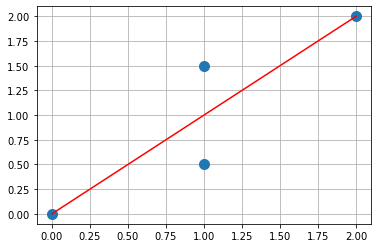

In [2]:
# %load '4.2.7.linreg.py'
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0, 1.0, 1.0, 2.0])
A = np.vstack([x, np.ones(len(x))]).T
y = np.array([0.0, 0.5, 1.5, 2.0])
[m, c], [r], _, _ = np.linalg.lstsq(A, y, rcond=None)

print(np.around(m,2), np.around(c,2), np.around(r,2))

plt.plot(x, y, 'o', markersize=10)
plt.plot(x, m*x + c, 'r')
plt.grid(True)
plt.show()
